# Preprocessing Workflow


🎯 This exercise will take you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

👇 Download the `ML_Houses_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv) and place it in the `data` folder. Then, run the code below to load the dataset and features you will be working with.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv")

data = data[['GrLivArea','BedroomAbvGr','KitchenAbvGr', 'OverallCond','RoofSurface','GarageFinish','CentralAir','ChimneyStyle','MoSold','SalePrice']].copy()

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


In [2]:
data.shape

(1760, 10)

👉 Take the time to do a preliminary investigation of the features by reading the dataset description available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to use refer to it throughout the day.

# Duplicates

ℹ️ Duplicates in datasets can cause data leakage. It is important to locate and remove any meaningless duplicates.

❓ How many duplicated rows are there in the dataset? Save your answer under variable name `duplicate_count`.

In [3]:
duplicate_count = data.duplicated().sum()
duplicate_count

300

👇 Remove the duplicates from the dataset. Overwite the dataframe `data`.

In [4]:
data = data.drop_duplicates()
len(data)

1460

### ☑️ Test your code

In [5]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicate_count,
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 2 items

tests/test_duplicates.py::TestDuplicates::test_dataset_length PASSED     [ 50%]
tests/test_duplicates.py::TestDuplicates::test_duplicate_count PASSED    [100%]

============================== 2 passed in 0.45s ===============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master


# Missing data

👇 Print out the percentage of missing values for all columns of the dataframe.

In [6]:
data.isna().sum()/len(data)

GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
RoofSurface     0.006164
GarageFinish    0.055479
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

In [7]:
data.isnull().sum().sort_values(ascending=False)/len(data)

GarageFinish    0.055479
RoofSurface     0.006164
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

## `GarageFinish`

👇 Investigate the missing values in `GarageFinish`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.

<details>
    <summary>💡 Hint</summary>
ℹ️ According to the dataset description, the missing values in `GarageFinish` represent a house having no garage. They need to be encoded as such.
</details>

In [8]:
data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [9]:
data['GarageFinish'].replace(np.nan, "NoGarage", inplace=True)

In [10]:
data.GarageFinish.value_counts()

Unf         605
RFn         422
Fin         352
NoGarage     81
Name: GarageFinish, dtype: int64

## `RoofSurface`

👇 Investigate the missing values in `RoofSurface`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `RoofSurface` has a few missing values that can be imputed by the median value.
</details>

In [11]:
data.RoofSurface.unique()

array([1995.,  874., 1593., ..., 2645.,  722., 3501.])

In [12]:
data.RoofSurface.isnull().sum()

9

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(strategy='median')
imputer.fit(data[['RoofSurface']])
data['RoofSurface'] = imputer.transform(data[['RoofSurface']])

In [15]:
data.RoofSurface.isnull().sum()

0

👇 When you are done, print out the percentage of missing values for the entire dataframe.

In [16]:
data.isnull().sum()/len(data)

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
ChimneyStyle    0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

In [17]:
data.dtypes

GrLivArea         int64
BedroomAbvGr      int64
KitchenAbvGr      int64
OverallCond       int64
RoofSurface     float64
GarageFinish     object
CentralAir       object
ChimneyStyle     object
MoSold            int64
SalePrice         int64
dtype: object

⚠️ Be careful: not all missing values are represented `np.nans`, and python's `isnull()` only detects `np.nans` ⚠️

## `ChimneyStyle`

👇 Investigate the missing values in `ChimneyStyle`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, it is better not to make any assumptions and to drop the column entirely.
</details>

In [18]:
data.ChimneyStyle.unique()

array(['bricks', 'castiron', '?'], dtype=object)

In [19]:
data.ChimneyStyle.value_counts()

?           1455
bricks         3
castiron       2
Name: ChimneyStyle, dtype: int64

In [20]:
data.drop(columns ='ChimneyStyle', inplace=True)

In [21]:
data.columns

Index(['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond',
       'RoofSurface', 'GarageFinish', 'CentralAir', 'MoSold', 'SalePrice'],
      dtype='object')

### ☑️ Test your code

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 2 items

tests/test_missing_values.py::TestMissing_values::test_nans PASSED       [ 50%]
tests/test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 0.66s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master


# Scaling

##  `RoofSurface` 

👇 Investigate `RoofSurface` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns by the transformed values.

<AxesSubplot:>

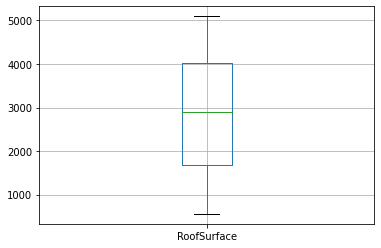

In [23]:
data[['RoofSurface']].boxplot()

array([[<AxesSubplot:title={'center':'RoofSurface'}>]], dtype=object)

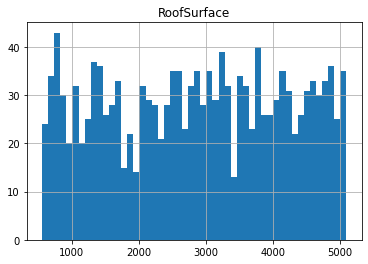

In [24]:
data[['RoofSurface']].hist(bins=50)

<details>
    <summary>💡 Hint</summary>
ℹ️ Since `RoofSurface` does not seem to have a normal distribution, it is better to MinMax scale.
</details>

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
mm_scaler = MinMaxScaler()

mm_scaler.fit(data[['RoofSurface']])

RoofSurface_mm_scaled = mm_scaler.transform(data[['RoofSurface']])

In [27]:
RoofSurface_mm_scaled

array([[0.31672912],
       [0.06964955],
       [0.22812431],
       ...,
       [0.03614723],
       [0.64866652],
       [0.55631475]])

<AxesSubplot:>

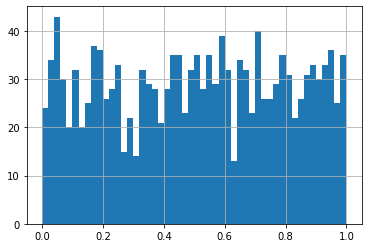

In [28]:
pd.DataFrame(RoofSurface_mm_scaled)[0].hist(bins=50)

In [29]:
data['RoofSurface'] = RoofSurface_mm_scaled
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,0.316729,RFn,Y,2,208500
1,1262,3,1,8,0.069650,RFn,Y,5,181500
2,1786,3,1,5,0.228124,RFn,Y,9,223500
3,1717,3,1,5,0.442583,Unf,Y,2,140000
4,2198,4,1,5,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1455,1647,3,1,5,0.251267,RFn,Y,8,175000
1456,2073,3,1,6,0.459996,Unf,Y,2,210000
1457,2340,4,1,9,0.036147,RFn,Y,5,266500
1458,1078,2,1,6,0.648667,Unf,Y,4,142125


## `GrLivArea`

👇 Investigate `GrLivArea` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns by the transformed values.

array([[<AxesSubplot:title={'center':'GrLivArea'}>]], dtype=object)

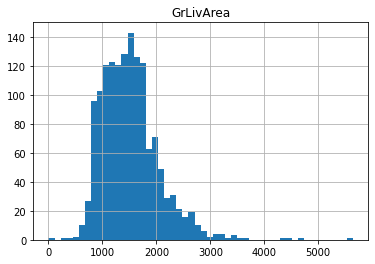

In [30]:
data[['GrLivArea']].hist(bins=50)

<AxesSubplot:>

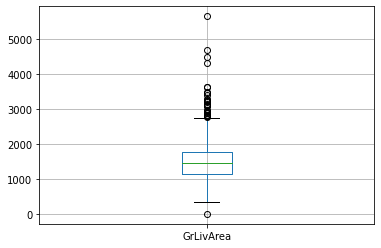

In [31]:
data[['GrLivArea']].boxplot()

In [32]:
data[['GrLivArea']].min() # -1 as surface area !!! Defnintely drop this observation :P

GrLivArea   -1
dtype: int64

In [33]:
false_value = data.GrLivArea.argmin()
data = data.drop(false_value)
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,0.316729,RFn,Y,2,208500
1,1262,3,1,8,0.069650,RFn,Y,5,181500
2,1786,3,1,5,0.228124,RFn,Y,9,223500
3,1717,3,1,5,0.442583,Unf,Y,2,140000
4,2198,4,1,5,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1455,1647,3,1,5,0.251267,RFn,Y,8,175000
1456,2073,3,1,6,0.459996,Unf,Y,2,210000
1457,2340,4,1,9,0.036147,RFn,Y,5,266500
1458,1078,2,1,6,0.648667,Unf,Y,4,142125


In [34]:
data.reset_index(drop=True)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,0.316729,RFn,Y,2,208500
1,1262,3,1,8,0.069650,RFn,Y,5,181500
2,1786,3,1,5,0.228124,RFn,Y,9,223500
3,1717,3,1,5,0.442583,Unf,Y,2,140000
4,2198,4,1,5,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1454,1647,3,1,5,0.251267,RFn,Y,8,175000
1455,2073,3,1,6,0.459996,Unf,Y,2,210000
1456,2340,4,1,9,0.036147,RFn,Y,5,266500
1457,1078,2,1,6,0.648667,Unf,Y,4,142125


<AxesSubplot:>

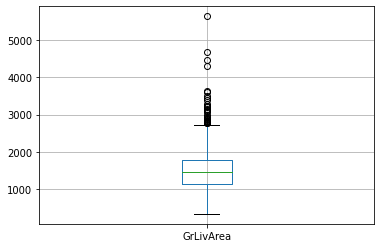

In [35]:
data[['GrLivArea']].boxplot()

<details>
    <summary>💡 Hint</summary>
ℹ️ `GrLivArea` has a normal distribution, and some outliers. It needs to be Robust scaled.
</details>

In [36]:
from sklearn.preprocessing import RobustScaler

In [37]:
r_scaler = RobustScaler()

r_scaler.fit(data[['GrLivArea']])

GrLivArea_r_scaled = r_scaler.transform(data[['GrLivArea']])
GrLivArea_r_scaled

array([[ 0.38021638],
       [-0.3122102 ],
       [ 0.49768161],
       ...,
       [ 1.35394127],
       [-0.59659969],
       [-0.32148377]])

<AxesSubplot:>

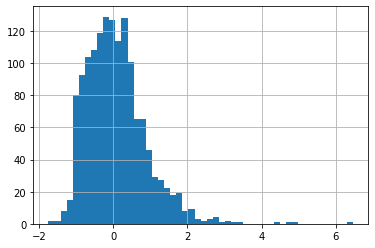

In [38]:
pd.DataFrame(GrLivArea_r_scaled)[0].hist(bins=50)

In [39]:
data['GrLivArea'] = GrLivArea_r_scaled
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380216,3,1,5,0.316729,RFn,Y,2,208500
1,-0.312210,3,1,8,0.069650,RFn,Y,5,181500
2,0.497682,3,1,5,0.228124,RFn,Y,9,223500
3,0.391036,3,1,5,0.442583,Unf,Y,2,140000
4,1.134467,4,1,5,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1455,0.282844,3,1,5,0.251267,RFn,Y,8,175000
1456,0.941267,3,1,6,0.459996,Unf,Y,2,210000
1457,1.353941,4,1,9,0.036147,RFn,Y,5,266500
1458,-0.596600,2,1,6,0.648667,Unf,Y,4,142125


## `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

👇 Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. Then, chose one of the following scaling techniques:

1. MinMax Scale
2. Standard Scale
3. Robust Scale

Replace the original columns by the transformed values.

<details>
    <summary>💡 Hint</summary>
ℹ️ `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` are ordinal features that can be MinMax scaled.
</details>

In [40]:
data.BedroomAbvGr.unique()

array([3, 4, 1, 2, 0, 5, 6, 8])

In [41]:
data.OverallCond.unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1])

In [42]:
data.KitchenAbvGr.unique()

array([1, 2, 3, 0])

In [43]:
feat_mm_scales = ['BedroomAbvGr', 'OverallCond','KitchenAbvGr']

mm_scaler.fit(data[feat_mm_scales])

features_mm_scaled = mm_scaler.transform(data[feat_mm_scales])
features_mm_scaled

array([[0.375     , 0.5       , 0.33333333],
       [0.375     , 0.875     , 0.33333333],
       [0.375     , 0.5       , 0.33333333],
       ...,
       [0.5       , 1.        , 0.33333333],
       [0.25      , 0.625     , 0.33333333],
       [0.375     , 0.625     , 0.33333333]])

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

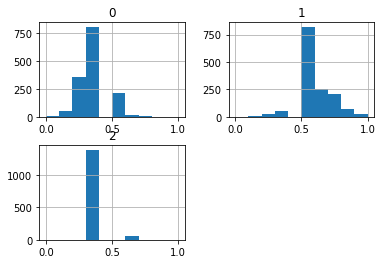

In [44]:
pd.DataFrame(features_mm_scaled).hist()

In [45]:
data[feat_mm_scales] = features_mm_scaled

In [46]:
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380216,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500
1,-0.312210,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500
2,0.497682,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500
3,0.391036,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000
4,1.134467,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1455,0.282844,0.375,0.333333,0.500,0.251267,RFn,Y,8,175000
1456,0.941267,0.375,0.333333,0.625,0.459996,Unf,Y,2,210000
1457,1.353941,0.500,0.333333,1.000,0.036147,RFn,Y,5,266500
1458,-0.596600,0.250,0.333333,0.625,0.648667,Unf,Y,4,142125


### ☑️ Test your code

In [47]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 3 items

tests/test_scaling.py::TestScaling::test_bedroom_kitchen_condition PASSED [ 33%]
tests/test_scaling.py::TestScaling::test_gr_liv_area PASSED              [ 66%]
tests/test_scaling.py::TestScaling::test_roof_surface PASSED             [100%]

============================== 3 passed in 0.43s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master


# Feature Engineering

## `GarageFinish`

👇 Investigate `GarageFinish` and chose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.


<details>
    <summary>💡 Hint</summary>
ℹ️ `GarageFinish` is a multicategorical feature that must be One hot encoded.
</details>

In [48]:
data.head(3)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380216,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500
1,-0.312210,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500
2,0.497682,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500


In [49]:
data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)

In [50]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data

,GarageFinish,CentralAir
0,RFn,Y
1,RFn,Y
2,RFn,Y
3,Unf,Y
4,RFn,Y
...,...,...
1455,RFn,Y
1456,Unf,Y
1457,RFn,Y
1458,Unf,Y


In [49]:
data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
ohe = OneHotEncoder(sparse=False)

ohe.fit(data[['GarageFinish']])
GarageFinished_ohe = ohe.transform(data[['GarageFinish']])

In [54]:
GarageFinished_ohe.shape

(1459, 4)

In [59]:
GarageFinished_ohe

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [63]:
ohe.categories_

[array(['Fin', 'NoGarage', 'RFn', 'Unf'], dtype=object)]

In [66]:
data['Fin'], data['NoGarage'], data['RFn'], data['Unf'] = GarageFinished_ohe.T

In [77]:
data.drop(columns=['GarageFinish'], inplace=True)

## Encoding  `CentralAir`

👇 Investigate `CentralAir` and chose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column by the encoding.

<details>
    <summary>💡 Hint</summary>
ℹ️ `CentralAir` is a binary categorical feature.
</details>

In [70]:
data.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [71]:
ohe_CA = OneHotEncoder(drop='if_binary', sparse=False)

ohe_CA.fit(data[['CentralAir']])

data['CentralAir'] = ohe_CA.transform(data[['CentralAir']])

In [78]:
data.head(3)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,RFn,Unf,Fin,NoGarage
0,0.380216,0.375,0.333333,0.500,0.316729,1.0,2,208500,1.0,0.0,0.0,0.0
1,-0.312210,0.375,0.333333,0.875,0.069650,1.0,5,181500,1.0,0.0,0.0,0.0
2,0.497682,0.375,0.333333,0.500,0.228124,1.0,9,223500,1.0,0.0,0.0,0.0


In [79]:
data.CentralAir.value_counts()

1.0    1364
0.0      95
Name: CentralAir, dtype: int64

## `MoSold` - Cyclical engineering 

Data can be continuous, discrete, categorical, ordinal, but it can also be cyclical. Temporal data is a prime example of that: months, days, minutes. Such data needs specific preprocessing for Machine Learning models to understand and consider its cyclical nature.

Consider the feature `MoSold`, the month on which the house was sold. If left as is, a model would not understand that after 12 (December) comes 1 (January). It would only consider the values on a linear scale.

👇 Do your own investigation on how to preprocess cyclical features in Machine Learning. Then, transform `MoSold` according to your findings.

⚠️ Replace the original column by the new features.

<details>
    <summary>💡 Hint</summary>
ℹ️ This [article]((https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/)) explains how to deal with cyclical features.
</details>

**❓ How would you name these 2 new features?**

In [ ]:
mo_sold_features = [] # fill the list with the new features names

In [ ]:
## Encode MoSold

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding', dataset = data, new_features = mo_sold_features)

result.write()
print(result.check())

# Export the dataset

👇 Now that the dataset has been preprocessed, execute the code below to export it. You will keep working on it in the next exercise.

In [ ]:
data.to_csv("../02-Feature-Selection/data/clean_dataset.csv", index=False)

# 🏁